In [2]:
"""
在矩形区域内随机N个点，求解它们的凸包。要求采取的算法时间复杂度较低。给出算法思路，运用任意语言实现快速凸包算法，并就执行时间与N的关系进行量化分析。
本作业提交代码和调研分析文档。文档按规定的字体和行间距等进行排版（同上），文档提交PDF版本即可，通常在2页左右，文档中不排版代码。
"""
 
import random
import math
import matplotlib.pyplot as plt
import time
 
# 使能够正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
 
"""定义一些参数 把点随机生成出来"""
# 生成随机数，并设置随机数种子，以便复现
random.seed(10)
points_number = 10000  # 设置凸包点数
point_x_axis_list = random.sample(range(-points_number * 10, points_number * 10), points_number)
point_y_axis_list = random.sample(range(-points_number * 10, points_number * 10), points_number)
print(f"point_x_axis_list:{point_x_axis_list}")
print(f"point_y_axis_list:{point_y_axis_list}")
"""end"""
 
 


point_x_axis_list:[49789, -91459, 12430, 26500, 51543, -96112, -45973, 21262, 28790, -27250, 71303, -57997, -90982, 36490, 28472, -14077, -80054, -34465, 95440, -5325, -88320, 10204, -63644, 58122, -6918, 35, 10431, -25652, 76937, -31235, 19755, -54212, 79794, -20543, 73499, -4950, -65141, 19781, -37248, 15251, 60779, -1633, -88398, 52812, -98937, -38225, -64880, -48895, -20607, 40599, -4018, -37038, -17592, 74768, 43912, 18128, 14302, 23200, -82963, 71174, 53235, -14885, 31574, -58996, -41202, 8231, -37512, -90321, -91678, 30181, -21052, 59036, 72462, -81117, 39849, -78780, -60761, 773, 48697, -1913, 57628, -60768, -70400, -74676, 15749, -56389, -49950, -8596, 13569, 8548, 16813, -35649, 78464, -27989, -62379, 61809, 36801, -53218, -68679, -30001, 19468, -20684, -56763, 73125, 70059, -54307, -53840, 25864, -8887, -14001, 13956, -41368, -98688, 42829, 86796, -88552, -13059, -16266, -36398, -79049, -31380, 17455, 6113, 52790, -58521, 2390, 29960, 76515, -36717, 93022, 37718, -28778, 363

'end'

In [4]:
class DrawPoint(object):
    """画点的类"""
 
    def __init__(self):
        self.fontsize = 14
        self.scatter_s = 5
        self.connect_point_color = 'r'
        self.plot_marker = 'H'
        self.plt_obj = plt
 
    def draw_points(self, point_x_axis_list: list, point_y_axis_list: list, xlabel: str, ylabel: str, title: str):
        """把点显示出来"""
        self.plt_obj.scatter(point_x_axis_list, point_y_axis_list, s=self.scatter_s)
        # # 设置图表标题并给坐标轴加上标签
        self.plt_obj.title(title, fontsize=self.fontsize)
        self.plt_obj.xlabel(xlabel, fontsize=self.fontsize)
        self.plt_obj.ylabel(ylabel, fontsize=self.fontsize)
 
    def connect_points(self, point_x_axis_list: list, point_y_axis_list: list):
        """按顺序连接各点"""
        self.plt_obj.plot(point_x_axis_list, point_y_axis_list, color=self.connect_point_color, marker=self.plot_marker)
 
    def plt_show(self):
        self.plt_obj.show()
 
 
class PointsProcess(object):
    """点的处理类"""
 
    def __init__(self):
        pass
 
    def calculate_two_points_distance(self, start_point_x, start_point_y, end_point_x, end_point_y):
        """两点之间的欧氏距离"""
        two_points_distance = math.sqrt((start_point_x - end_point_x) ** 2 + (start_point_y - end_point_y) ** 2)
        two_points_distance = round(two_points_distance, 3)
        # print(f"点（{start_point_x},{start_point_y}）和点（{end_point_x},{end_point_y}）的距离为：{two_points_distance}")
        return two_points_distance
 
    def calculate_three_points_angle(self, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y):
        """计算3点之间的夹角，默认返回中间点的夹角,使用余弦定理"""
        distance1_2 = self.calculate_two_points_distance(point1_x, point1_y, point2_x, point2_y)
        distance2_3 = self.calculate_two_points_distance(point2_x, point2_y, point3_x, point3_y)
        # print(f"distance1_2:{distance1_2},distance2_3:{distance2_3}")
        distance1_3 = self.calculate_two_points_distance(point1_x, point1_y, point3_x, point3_y)
        _temp_value = (distance1_3 * distance1_3 - distance1_2 * distance1_2 - distance2_3 * distance2_3) / (
                    -2 * distance1_2 * distance2_3)
        # 防止超过数学领域
        if _temp_value > 1:
            _temp_value = 1
        elif _temp_value < -1:
            _temp_value = -1
        angle2 = math.degrees(math.acos(_temp_value))
        angle2 = round(angle2, 3)
        # print(f"点({point1_x},{point1_y})、({point2_x},{point2_y})、({point3_x},{point3_y})对应的angle2为：{angle2}")
        return angle2
 
    def calculate_three_points_angle2(self, distance1_2, point1_x, point1_y, point2_x, point2_y, point3_x, point3_y):
        """计算3点之间的夹角，默认返回中间点的夹角,使用余弦定理"""
        distance1_2 = distance1_2
        distance2_3 = self.calculate_two_points_distance(point2_x, point2_y, point3_x, point3_y)
        # print(f"distance1_2:{distance1_2},distance2_3:{distance2_3}")
        distance1_3 = self.calculate_two_points_distance(point1_x, point1_y, point3_x, point3_y)
        angle2 = int(math.degrees(math.acos(
            (distance1_3 * distance1_3 - distance1_2 * distance1_2 - distance2_3 * distance2_3) / (
                    -2 * distance1_2 * distance2_3))))
        # print(f"点({point1_x},{point1_y})、({point2_x},{point2_y})、({point3_x},{point3_y})对应的angle2为：{angle2}")
        return angle2
 
    def cal_angle_two_points_and_xaxis(self, start_point_x, start_point_y, end_point_x, end_point_y):
        """计算两点之间与x轴的夹角"""
        dx = end_point_x - start_point_x
        dy = end_point_y - start_point_y
        angle = None
        # 两个点在同一列上
        if dx == 0:
            # 箭头向上，90度
            if dy > 0:
                angle = 90
            # 箭头向下，270度
            elif dy < 0:
                angle = 270
            # 两个点重叠一般这种情况不存在，没有意义，这里设置为180度
            else:
                angle = 180
        # 不在同一列上
        else:
            if dx > 0:
                if dy > 0:  # 箭头指向右上角,ok
                    angle = int(math.atan(dy / dx) / math.pi * 180)
                elif dy < 0:  # 箭头指向右下角 算出的角度是负数，要加2pi
                    angle = int((math.atan(dy / dx) + math.pi * 2) / math.pi * 180)
                else:  # dy = 0 说明在同一行，箭头指向坐标轴右侧
                    angle = 0
            else:
                if dy == 0:  # 箭头指向坐标轴左侧
                    angle = 180
                else:  # dx < 0 箭头指向左上角或者左下角，计算方法都一样。在左上角时算出是负数要+pi，在右下角时算出是正数要+pi
                    angle = int((math.atan(dy / dx) + math.pi) / math.pi * 180)
        # print(f"点（{start_point_x},{start_point_y}）和点（{end_point_x},{end_point_y}）的角度angle为：{angle}度")
        return angle

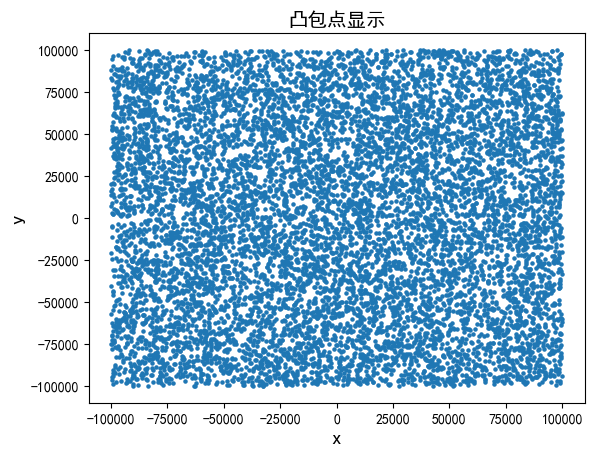

In [7]:
draw_obj = DrawPoint()
draw_obj.draw_points(point_x_axis_list=point_x_axis_list, point_y_axis_list=point_y_axis_list, xlabel="x", ylabel="y",
                     title="凸包点显示")
draw_obj.plt_show()
 
"""*************************************************方法一   包裹法*********************************************"""
pack_way_start_time = time.time()
acme_index_list = []  # 凸包顶点
points_index = []  # 点索引列表
for i in range(len(point_x_axis_list)):
    points_index.append(i)
point_process_obj_for_pack_way = PointsProcess()
draw_obj_for_pack_way = DrawPoint()


acme_index_list:[8801, 2080, 8176, 9446, 6667, 5663, 9675, 3996, 2690, 2426, 5537, 1240, 6200, 4252, 8902, 4701, 9149, 2923, 5016, 7880, 3994, 2267, 8801]
acme_x_list:[27671, 97440, 98865, 99906, 99983, 99997, 99993, 99979, 99687, 97567, 21725, -92012, -98943, -99452, -99842, -99906, -99891, -99881, -99716, -99078, -90316, -83465, 27671]
acme_y_list:[-99997, -99701, -98530, -94109, -61790, -33227, 46574, 62654, 97418, 99937, 99964, 99844, 96073, 94328, 87910, 83452, -40773, -75197, -96433, -98632, -99895, -99989, -99997]


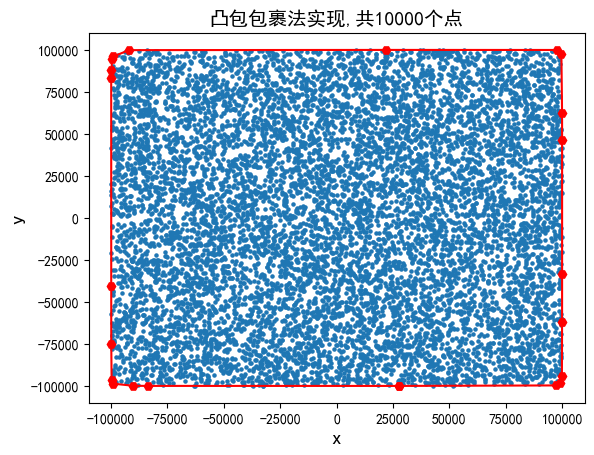

包裹法花费的时间为：7.52129s


'*************************************************end*********************************************************'

In [8]:
draw_obj_for_pack_way.draw_points(point_x_axis_list=point_x_axis_list, point_y_axis_list=point_y_axis_list, xlabel="x",
                                  ylabel="y",
                                  title=f"凸包包裹法实现,共{points_number}个点")
 
# 选择凸包的最低点作为起点，同时也是第一个顶点。但是点索引集不能去掉起点，不然找不到首尾对应的break条件
lowest_point_index = point_y_axis_list.index(min(point_y_axis_list))
acme_index_list.append(lowest_point_index)
# print(f"lowest_point_index:{lowest_point_index}")
start_point_index = lowest_point_index
point1_index = start_point_index
point2_index = None
point3_index = None
while True:
 
    if len(acme_index_list) == 1:
        """找第二个顶点，和起点的角度要最小"""
        # 最小的角度初始化为360度，最小角度索引还不知道，为空
        min_angle = 360
        min_angle_index = None
        for current_point_index in points_index:
            angle = point_process_obj_for_pack_way.cal_angle_two_points_and_xaxis(
                start_point_x=point_x_axis_list[start_point_index],
                start_point_y=point_y_axis_list[start_point_index],
                end_point_x=point_x_axis_list[current_point_index],
                end_point_y=point_y_axis_list[current_point_index])
            if angle < min_angle:
                min_angle = angle
                min_angle_index = current_point_index
                # print(f"min_angle:{min_angle},min_angle_index:{min_angle_index}")
        acme_index_list.append(min_angle_index)  # 找到最小角度的点为新的凸包顶点，加入凸包顶点列表中
        start_point_index = min_angle_index  # 新的凸包顶点作为新的起点，同时点索引集没有它了
        points_index.remove(min_angle_index)
        point2_index = min_angle_index
    else:
        """找其它顶点，前2个点和后2个点的角度要最大"""
        max_angle = 0
        max_angle_index = None
        for current_point_index in points_index:
            angle = point_process_obj_for_pack_way.calculate_three_points_angle(
                point1_x=point_x_axis_list[point1_index],
                point1_y=point_y_axis_list[point1_index],
                point2_x=point_x_axis_list[point2_index],
                point2_y=point_y_axis_list[point2_index],
                point3_x=point_x_axis_list[current_point_index],
                point3_y=point_y_axis_list[current_point_index])
            if angle > max_angle:
                max_angle = angle
                max_angle_index = current_point_index
 
        acme_index_list.append(max_angle_index)  # 找到最小角度的点为新的凸包顶点，加入凸包顶点列表中
        points_index.remove(max_angle_index)
 
        # 更新索引
        point1_index = point2_index
        point2_index = max_angle_index
 
        # 直到回到原点时退出
        if lowest_point_index == max_angle_index:
            break
    # print(f"acme_index_list:{acme_index_list}")

# 生成凸包顶点列表
print(f"acme_index_list:{acme_index_list}")
acme_x_list = [point_x_axis_list[i] for i in acme_index_list]
acme_y_list = [point_y_axis_list[i] for i in acme_index_list]
print(f"acme_x_list:{acme_x_list}")
print(f"acme_y_list:{acme_y_list}")
 
# 画图
draw_obj_for_pack_way.connect_points(point_x_axis_list=acme_x_list, point_y_axis_list=acme_y_list)
draw_obj_for_pack_way.plt_show()
 
pack_way_end_time = time.time()
print(f"包裹法花费的时间为：{round((pack_way_end_time - pack_way_start_time), 5)}s")
"""*************************************************end*********************************************************"""